In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud_data=pd.read_csv("Fraud_check.csv")
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
Fraud_data=fraud_data.rename({'Taxable.Income':'Taxable_Income','City.Population':'City_Population',
                              'Work.Experience':'Work_Experience','Marital.Status':'Marital_Status'},axis=1)
Fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data=pd.DataFrame(pd.cut(Fraud_data.Taxable_Income,bins=[0,30000,100000],labels=['Risky','Good']))
data

,Taxable_Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [6]:
Fraud_Data=Fraud_data.drop('Taxable_Income',axis=1)
Fraud_Data

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [7]:
Fraud_Data1=pd.concat([Fraud_Data,data],axis=1)
Fraud_Data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [8]:
data_category=Fraud_Data1.select_dtypes(exclude=[np.number]).columns
data_category

Index(['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Income'], dtype='object')

In [9]:
Fraud_Data1[data_category].head()

,Undergrad,Marital_Status,Urban,Taxable_Income
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good


In [11]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
for i in data_category:
    Fraud_Data1[i]=labelEncoder.fit_transform(Fraud_Data1[i])

In [12]:
Fraud_Data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
Fraud_Data2=pd.DataFrame(trans.fit_transform(Fraud_Data1.iloc[:,[2,3]]))
Fraud_Data2.head()

,0,1
0,0.139472,0.333333
1,0.622394,0.600000
2,0.772568,1.000000
3,0.962563,0.500000
4,0.010081,0.933333


In [14]:
Fraud_Data2.columns=['City_Population','Work_Experience']
Fraud_Data2.head()

,City_Population,Work_Experience
0,0.139472,0.333333
1,0.622394,0.600000
2,0.772568,1.000000
3,0.962563,0.500000
4,0.010081,0.933333


In [15]:
Fraud_Data3=Fraud_Data1.drop(['City_Population','Work_Experience'],axis=1)
Fraud_Data3.head()

,Undergrad,Marital_Status,Urban,Taxable_Income
0,0,2,1,0
1,1,0,1,0
2,0,1,1,0
3,1,2,1,0
4,0,1,0,0


In [16]:
Fraud_Data4=pd.concat([Fraud_Data3,Fraud_Data2],axis=1)
Fraud_Data4.head()

,Undergrad,Marital_Status,Urban,Taxable_Income,City_Population,Work_Experience
0,0,2,1,0,0.139472,0.333333
1,1,0,1,0,0.622394,0.600000
2,0,1,1,0,0.772568,1.000000
3,1,2,1,0,0.962563,0.500000
4,0,1,0,0,0.010081,0.933333


In [18]:
X=Fraud_Data4.iloc[:,[0,1,2,4,5]]
Y=Fraud_Data4.iloc[:,3]

In [19]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)

Model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(Model, X, Y, cv=kfold)
print(results.mean()*100)

74.49999999999999


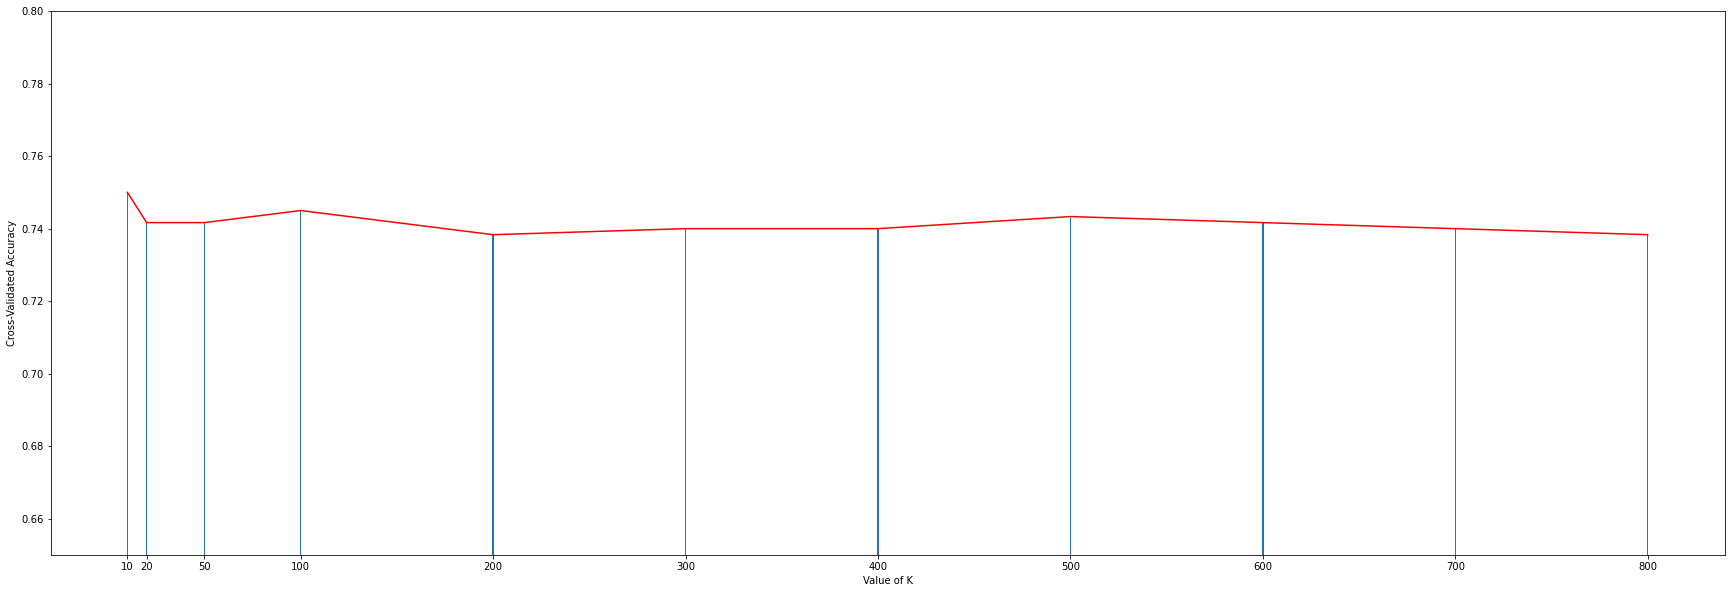

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = [10,20,50,100,200,300,400,500,600,700,800]
k_scores = []
array = Fraud_Data4.values

X = array[:,[0,1,2,4,5]]
Y = array[:,3]

for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.65,0.80)
plt.show()

In [21]:
k_scores

[0.75,
 0.7416666666666667,
 0.7416666666666666,
 0.7449999999999999,
 0.7383333333333334,
 0.74,
 0.74,
 0.7433333333333334,
 0.7416666666666667,
 0.74,
 0.7383333333333334]